<a href="https://colab.research.google.com/github/Shreyas-13/Tensorflow-Developer/blob/main/02_NeuralNetwork__Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Neural Network Classification

Types of classifications:
  * Binary Classification
  * Multi-class Classification
  * Multi-label Classification

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

## Make 1000 samples
n_samples = 1000

## Create Circles
X, y = make_circles(n_samples, noise=.03, random_state=42)

In [5]:
## Features and Labels
print('Features-', X[:10])
print('Target-', y[:10])

Features- [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]
 [-0.47964637  0.67643477]
 [-0.01364836  0.80334872]
 [ 0.77151327  0.14775959]
 [-0.16932234 -0.79345575]
 [-0.1214858   1.02150905]]
Target- [1 1 1 1 0 1 1 1 1 0]


In [6]:
import pandas as pd

df = pd.DataFrame({'X0':X[:, 0], 'X1':X[:, 1], 'Y':y})
df.head()

,X0,X1,Y
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


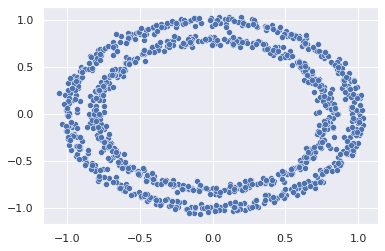

In [10]:
## Visulaize
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid", palette="deep")

sns.scatterplot(X[:, 0], X[:, 1], cmap='RdYlBu')

In [12]:
## Shape of data

print('Features Shape-', X.shape, '\nTarget Shape-', y.shape)

Features Shape- (1000, 2) 
Target Shape- (1000,)


### Steps in modelling

1. Create or import a model
2. Compile
3. Fit
4. Evaluate
5. Tweak
6. Repeat

In [26]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

tf.random.set_seed(42)

X_train, X_test, y_train, y_test = train_test_split(df[['X0', 'X1']],
                                                    df[['Y']], 
                                                    test_size=.2, 
                                                    random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

model = tf.keras.Sequential([
                            #  tf.keras.Input(shape=X_train.shape),
                             tf.keras.layers.Dense(64, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100, verbose=0)

(800, 2) (200, 2) (800, 1) (200, 1)


In [27]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.2914 - accuracy: 1.0000


[0.29140326380729675, 1.0]